### Import all the necessary libraries

In [15]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler

### Set Matplotlib defaults

In [16]:
# Set Matplotlib defaults
plt.style.use("seaborn-v0_8-whitegrid")  # Updated style
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

### Set the working directory and read the dataset

In [17]:
# Set working directory
os.chdir(r'D:\KDG\2024-2025\Semester 1\DAI5\GroupProject\Resources')

missing_values = ['n/a', 'na', 'nan', 'N/A', 'NA', 'NaN', 'NAN', '--', 'Missing']
df = pd.read_csv('cleaned_employees.csv', na_values=missing_values, sep=',', decimal='.')

pd.set_option('display.max_columns', None)  # to see all the columns
print(df.head())
print(df.info())

   EmpID  Gender  Age MaritalStatus        JobLevel  Experience       Dept  \
0      6    Male   32       Married             Mid           7         IT   
1     11  Female   34       Married             Mid          12    Finance   
2     33  Female   23        Single  Intern/Fresher           1  Marketing   
3     20  Female   29       Married          Junior           6         IT   
4     28   Other   23        Single          Junior           1      Sales   

     EmpType  PhysicalActivityHours  Workload  Stress  SleepHours  \
0  Full-Time                    2.5         2       1         7.6   
1  Full-Time                    1.8         2       2         7.9   
2  Full-Time                    2.1         5       4         6.5   
3   Contract                    1.9         3       1         7.5   
4  Part-Time                    3.7         2       1         4.9   

        CommuteMode  CommuteDistance  TeamSize  NumReports  haveOT  \
0               Car               20        12

### Define the features and the target

In [18]:
# Define all features and target
features =["Gender", "Age", "MaritalStatus", "JobLevel", "Experience", "Dept", "EmpType", "PhysicalActivityHours", "Workload", "Stress",  "SleepHours", "CommuteMode", "CommuteDistance", "TeamSize", "NumReports", "haveOT", "TrainingHoursPerYear"]

target = "JobSatisfaction"

# Extract X and y
X = df[features]  # Features
y = df[target]    # Target variable

## After analyzing the target variable, we decided to choose regression instead of classification, because the satisfaction level is an ordinal variable.

### Calculate the Mutual Information Scores to see the correlation between the target and the features

Mutual Information Scores:
Workload                 0.065878
SleepHours               0.050530
Age                      0.035232
Stress                   0.027575
haveOT                   0.018576
JobLevel                 0.015999
Experience               0.012244
Gender                   0.011651
MaritalStatus            0.007034
Dept                     0.005977
EmpType                  0.004662
PhysicalActivityHours    0.000000
CommuteMode              0.000000
CommuteDistance          0.000000
TeamSize                 0.000000
NumReports               0.000000
TrainingHoursPerYear     0.000000
Name: MI Scores, dtype: float64


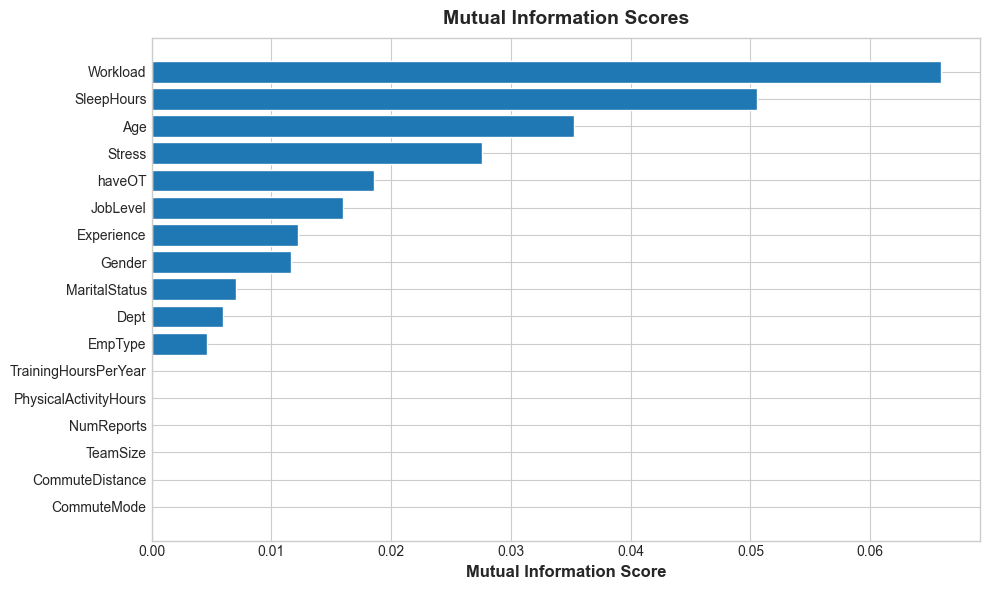

In [19]:
# Utility function to calculate Mutual Information scores
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()  # Factorize categorical variables
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

# Utility function to plot Mutual Information scores
def plot_mi_scores(scores):
    plt.figure(figsize=(10, 6))  # Specify figure size for better visibility
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    plt.xlabel("Mutual Information Score")  # Add label for x-axis
    plt.show()  # Show the plot

# Calculate MI scores and plot
mi_scores = make_mi_scores(X, y)  # Calculate MI scores
print("Mutual Information Scores:")
print(mi_scores)  # Print MI scores for review
plot_mi_scores(mi_scores)           # Plot MI scores

## According to this result, the most interesting features are: Workload, Stress and Sleep Hours

### Correlation map for the interesting features

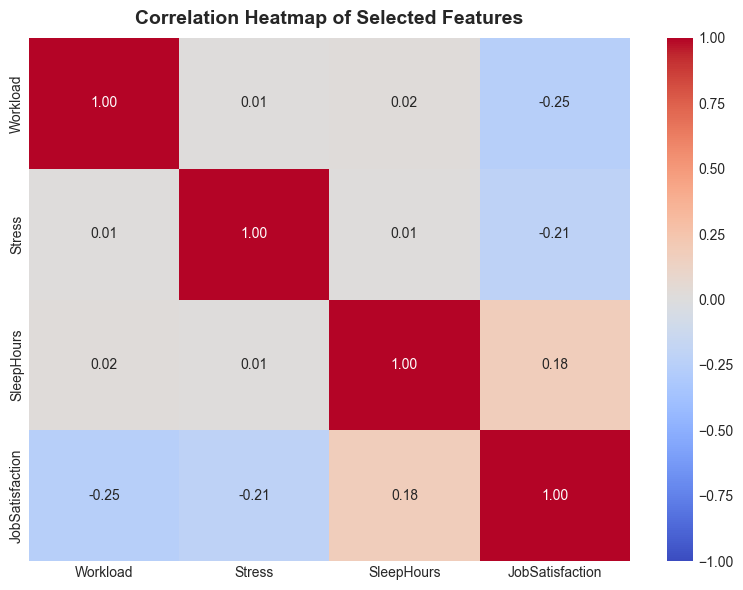

In [20]:
features =["Workload", "Stress",  "SleepHours", "JobSatisfaction"]

corr_matrix = df[features].corr()

# plot the heatmap for the specified columns
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title("Correlation Heatmap of Selected Features")
plt.show()

### Distribution of the interesting features

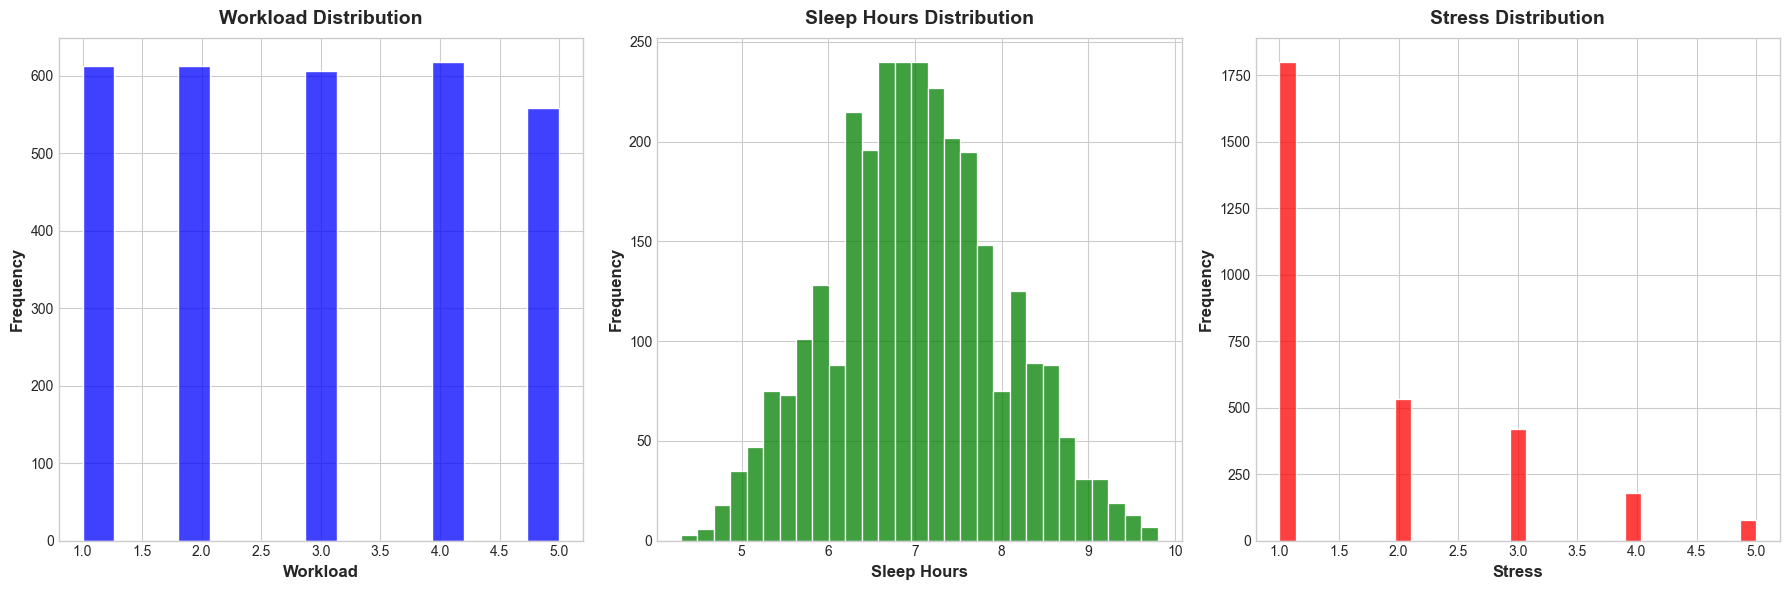

In [21]:
# Create a figure for plotting
plt.figure(figsize=(18, 6))

# Plot histogram for workload
plt.subplot(1, 3, 1)
sns.histplot(df['Workload'], color='blue', kde=False)  # Simple histogram
plt.title('Workload Distribution', fontsize=14)
plt.xlabel('Workload', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Plot histogram for sleep hours
plt.subplot(1, 3, 2)
sns.histplot(df['SleepHours'], color='green', kde=False)
plt.title('Sleep Hours Distribution', fontsize=14)
plt.xlabel('Sleep Hours', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Plot histogram for stress
plt.subplot(1, 3, 3)
sns.histplot(df['Stress'], color='red', kde=False)
plt.title('Stress Distribution', fontsize=14)
plt.xlabel('Stress', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


### Line plot for each interesting feature, in combination with Job Satisfaction

In [22]:
# Standard scaling the relevant features
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[['Workload', 'SleepHours', 'Stress', 'JobSatisfaction']] = scaler.fit_transform(df[['Workload', 'SleepHours', 'Stress', 'JobSatisfaction']])


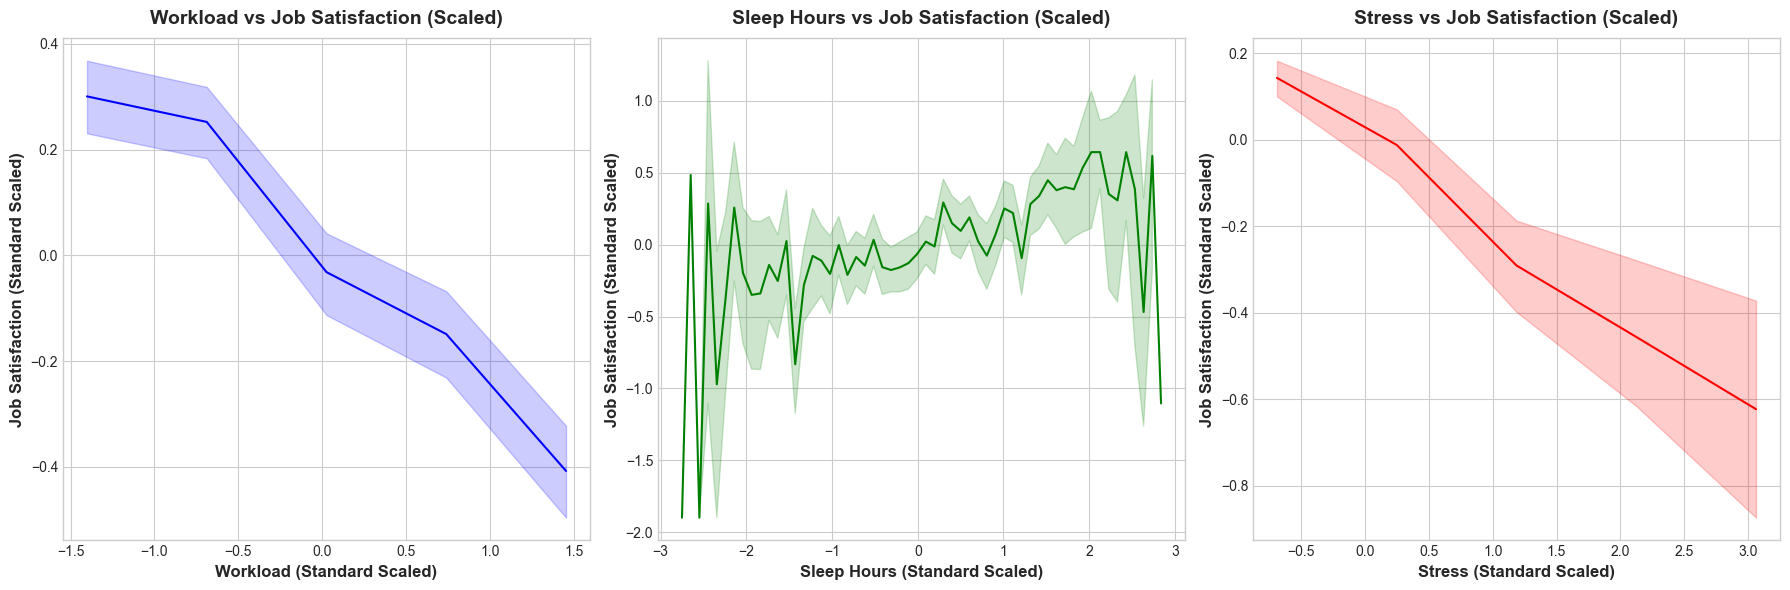

In [23]:
# Line plots for each feature vs Job Satisfaction
plt.figure(figsize=(18, 6))

# Line plot for Workload vs Job Satisfaction
plt.subplot(1, 3, 1)
sns.lineplot(x=df_scaled['Workload'], y=df_scaled['JobSatisfaction'], color='blue')
plt.title('Workload vs Job Satisfaction (Scaled)', fontsize=14)
plt.xlabel('Workload (Standard Scaled)', fontsize=12)
plt.ylabel('Job Satisfaction (Standard Scaled)', fontsize=12)

# Line plot for Sleep Hours vs Job Satisfaction
plt.subplot(1, 3, 2)
sns.lineplot(x=df_scaled['SleepHours'], y=df_scaled['JobSatisfaction'], color='green')
plt.title('Sleep Hours vs Job Satisfaction (Scaled)', fontsize=14)
plt.xlabel('Sleep Hours (Standard Scaled)', fontsize=12)
plt.ylabel('Job Satisfaction (Standard Scaled)', fontsize=12)

# Line plot for Stress vs Job Satisfaction
plt.subplot(1, 3, 3)
sns.lineplot(x=df_scaled['Stress'], y=df_scaled['JobSatisfaction'], color='red')
plt.title('Stress vs Job Satisfaction (Scaled)', fontsize=14)
plt.xlabel('Stress (Standard Scaled)', fontsize=12)
plt.ylabel('Job Satisfaction (Standard Scaled)', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()
